In [4]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [5]:
data = pd.read_csv('german_credit.csv') 
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
data.shape

(1000, 21)

In [59]:
# df = data.drop(columns='default',axis = 1, inplace=True)   # check error
# df.shape

In [63]:
# data.drop(columns='default',axis = 1, inplace=True)
# data.shape

(1000, 20)

In [7]:
data.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
dummy = pd.get_dummies(data)
dummy.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [69]:
# Print Shape of model data

In [9]:
dummy.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
dummy.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


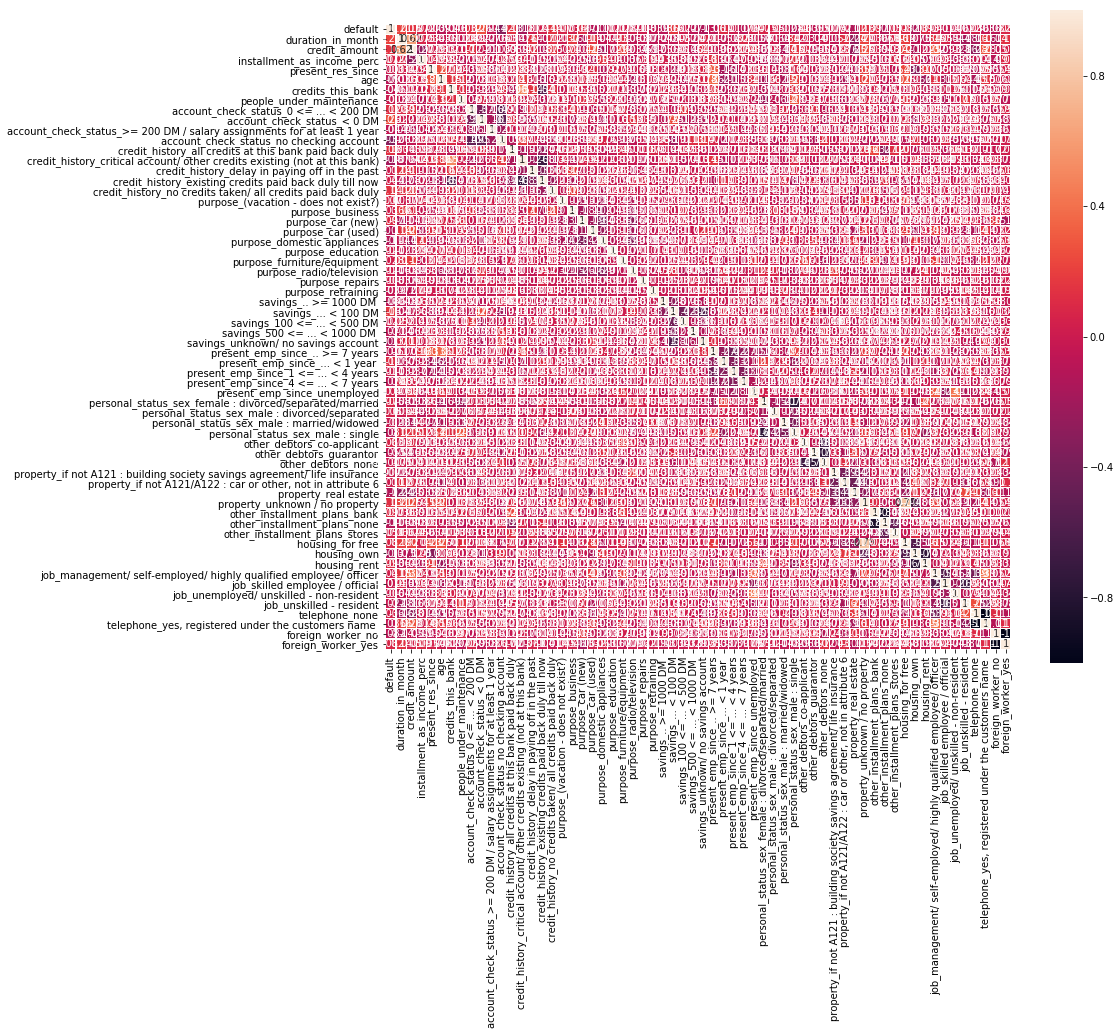

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(dummy.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### Drop the original variables which are converted to dummy

### Ans. The original variables which are converted to dummy are already dropped by get_dummies

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [12]:
# (Target-set)
y = dummy['default']
# (Feature-set)
X = dummy.drop('default' , axis = 1)

In [13]:
X.shape

(1000, 61)

In [14]:
y.shape

(1000,)

In [15]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 11 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [16]:
X_train.shape

(700, 61)

In [17]:
X_test.shape

(300, 61)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [19]:
rfcl = rfcl.fit(X_train, y_train)

In [20]:
rfcl.score(X_train, y_train)

1.0

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = rfcl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[188  14]
 [ 66  32]]


In [22]:
print("Testing Accuracy")
print(rfcl.score(X_test, y_test))

Testing Accuracy
0.7333333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [23]:
rfcl.feature_importances_

array([0.07729657, 0.0926712 , 0.03673912, 0.03295439, 0.0810058 ,
       0.01851697, 0.01057278, 0.01557184, 0.03201632, 0.00838139,
       0.05337169, 0.01043692, 0.01947367, 0.00897744, 0.01484258,
       0.00747364, 0.00792166, 0.00846309, 0.02065551, 0.01181195,
       0.01667687, 0.00489444, 0.00192673, 0.01258415, 0.00204462,
       0.00049731, 0.00590371, 0.02721925, 0.00767184, 0.00642342,
       0.01489508, 0.01404033, 0.01311817, 0.01463156, 0.01109792,
       0.00943396, 0.01707141, 0.00661968, 0.00846753, 0.01714547,
       0.0055322 , 0.00741533, 0.00819519, 0.01236132, 0.01484574,
       0.0144904 , 0.01095707, 0.01213894, 0.01615994, 0.00796388,
       0.00650107, 0.01421843, 0.0114971 , 0.01303277, 0.01555156,
       0.0026167 , 0.01055057, 0.01343484, 0.01332016, 0.00394665,
       0.00375218])

In [24]:
# Print the name and importance of each feature
for feature in zip(X.columns, rfcl.feature_importances_):
    print(feature)

('duration_in_month', 0.07729656893045372)
('credit_amount', 0.09267119978957351)
('installment_as_income_perc', 0.03673912164748677)
('present_res_since', 0.032954388875304524)
('age', 0.08100580191967943)
('credits_this_bank', 0.018516966993735267)
('people_under_maintenance', 0.010572783263945583)
('account_check_status_0 <= ... < 200 DM', 0.01557184489036169)
('account_check_status_< 0 DM', 0.03201632269560556)
('account_check_status_>= 200 DM / salary assignments for at least 1 year', 0.008381391196817073)
('account_check_status_no checking account', 0.053371693088771266)
('credit_history_all credits at this bank paid back duly', 0.010436919998593376)
('credit_history_critical account/ other credits existing (not at this bank)', 0.019473671392323984)
('credit_history_delay in paying off in the past', 0.008977436995932703)
('credit_history_existing credits paid back duly till now', 0.01484257657700327)
('credit_history_no credits taken/ all credits paid back duly', 0.00747363931736

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# Use below values
# num_folds = 10
# seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [26]:
# Applying k-Fold Cross Validation
rfcl1 = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=77)
scores = cross_val_score(rfcl1, X_train, y_train, cv=10, scoring='accuracy')

In [0]:
#Calculate Mean score

In [27]:
scores.mean()

0.7671460647945645

In [0]:
# Calculate score standard deviation using std()

In [28]:
scores.std()

0.036138768066989735

# Q8 Print the confusion matrix( 1 Marks)

In [29]:
from sklearn.metrics import confusion_matrix
rfcl1 = rfcl1.fit(X_train, y_train)
y_pred1 = rfcl1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[189  13]
 [ 63  35]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [30]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred1))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       202
           1       0.73      0.36      0.48        98

   micro avg       0.75      0.75      0.75       300
   macro avg       0.74      0.65      0.66       300
weighted avg       0.74      0.75      0.72       300





# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [31]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = rfcl1.predict_proba(X_test)[:, 1]

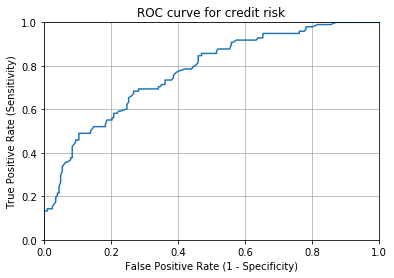

In [132]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit risk')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [33]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn import metrics
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7726308345120226


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [34]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [36]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# for i in range(bootstrap_iteration):
#     X_, y_ = resample(X_train, y_train)
#     rfm.fit(X_, y_)
#     y_pred2 = rfm.predict(X_test)
    
#     acc = accuracy_score(y_test,y_pred2)
#     accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768


In [37]:
pwd

'D:\\testlab'